Naive Bayes Model for Building Destruction Classification

In [10]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt


We start by reading data in from the cal_fire_data_cleaned CSV file:

In [11]:
cal_fire_data = pd.read_csv('../data/cal_fire_data_cleaned.csv')
cal_fire_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42789 entries, 0 to 42788
Data columns (total 15 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   * Structure Type                             42789 non-null  object 
 1   * Roof Construction                          42789 non-null  object 
 2   * Eaves                                      42789 non-null  object 
 3   * Vent Screen                                42789 non-null  object 
 4   * Exterior Siding                            42789 non-null  object 
 5   * Window Pane                                42789 non-null  object 
 6   * Deck/Porch On Grade                        42789 non-null  object 
 7   * Deck/Porch Elevated                        42789 non-null  object 
 8   * Patio Cover/Carport Attached to Structure  42789 non-null  object 
 9   * Fence Attached to Structure                42789 non-null  object 
 10

We perform one-hot encoding on our categorical features to make them usable by the model:

In [12]:
cal_fire_data = pd.get_dummies(cal_fire_data, columns=cal_fire_data.select_dtypes('object').columns)


We set our feature (categorical features only) and target variables and create a train/test split (80%/20%):

In [13]:
from sklearn.model_selection import train_test_split

X = cal_fire_data.drop(columns=['Destroyed','Latitude','Longitude','Age','Assessed Improved Value (parcel)'])
y = cal_fire_data['Destroyed']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=216, shuffle=True, stratify=y)
y.value_counts(normalize=True)


Destroyed
0    0.59763
1    0.40237
Name: proportion, dtype: float64

A MinMaxScaler is needed to remove negative numbers in order to make the model work properly:

In [14]:
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)


For this model, we classify each observation by applying Naive Bayes principles to the categorical features of the data.

In [15]:
from sklearn.naive_bayes import CategoricalNB

cnb = CategoricalNB()
cnb.fit(X_train,y_train)
y_pred = cnb.predict(X_test)


Along with the prediction accuracy, we have a classification report that includes precision, recall, and f1 scores:

In [16]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test,y_pred)
print("accuracy: ", accuracy)
print("\nreport: \n")
print(classification_report(y_test,y_pred))


accuracy:  0.831385837812573

report: 

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      5115
           1       0.83      0.73      0.78      3443

    accuracy                           0.83      8558
   macro avg       0.83      0.82      0.82      8558
weighted avg       0.83      0.83      0.83      8558



We also have a confusion matrix showing how the model performed across classes:

In [17]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


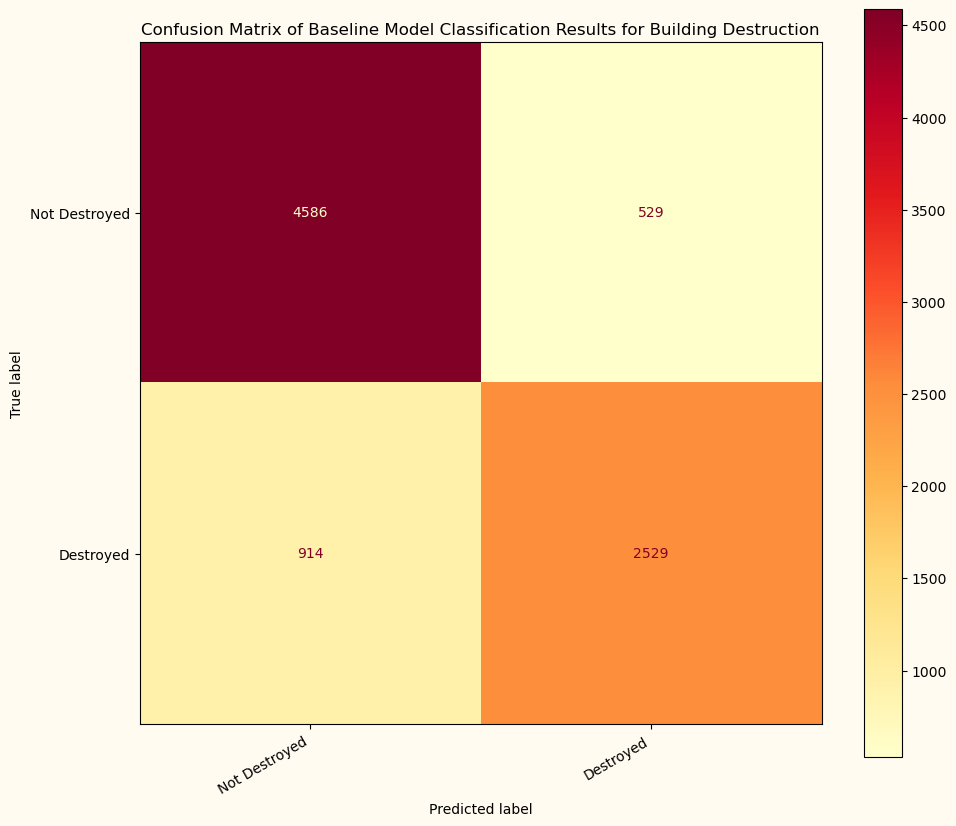

In [18]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Destroyed', 'Destroyed'])
fig, ax = plt.subplots(figsize=(11, 11), facecolor = ('#fffbf0'))
disp.plot(ax=ax, cmap='YlOrRd')
fig.autofmt_xdate()
plt.title("Confusion Matrix of Baseline Model Classification Results for Building Destruction")
plt.show()
